<a href="https://colab.research.google.com/github/AlfaIV/Microwave-and-Antennas-LabWork/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%964_%D0%A1%D0%92%D0%A7_%D0%B8_%D0%90%D0%BD%D1%82%D0%B5%D0%BD%D0%BD%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.constants as const
import math 
from math import pi,cos,atan,sin,exp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Экспериментальная часть


In [2]:
Theta_0 = [0,math.radians(8),math.radians(16)]#еще два неизвестных значения
Theta_0_i = Theta_0[0]


# ЛР установка №1

In [3]:
Delta = 0.1
D_paa = 135*const.milli
R = D_paa/2
A = lambda r: Delta + (1 - Delta)*cos(pi/2 * r/R)


# ЛР установка №2

Значения амплитуд поля в точках раскрыва антенны, лежащих напротиив осей ферритовых стержней линзы.

In [4]:
alpha_0 = math.radians(40)#угол раствора рупора

F = 13.5*const.giga #частота генератора
lambda_0 = const.c/F
k = 2*(pi)/lambda_0


f = 330*const.milli #фокусное расстояние
d = 12*const.milli
t = 4*const.milli
h = 4*const.milli
L = 400*const.milli
h = 5*const.milli
b = 5*const.milli
B = 20*const.milli

R = L/2#??

In [5]:
alpha_n = lambda n: atan((n*d/R) / (f/R - (n*d/R)**2  *  R/(4*f)))
A_n = lambda n: cos(alpha_n(n)*pi/(2*alpha_0)) * (1 + cos(alpha_n(n)))/2
n = [i for i in range(-14,14 + 1)]

In [6]:
alpha_n_data = [alpha_n(n_i) for n_i in n]
A_n_data = [A_n(n_i) for n_i in n]
A_n_data[1:10]

[0.4757817599089548,
 0.5422318092273939,
 0.6064881185565728,
 0.6678965454385702,
 0.7258096819752566,
 0.7795976372224281,
 0.8286590285084304,
 0.8724319045072783,
 0.9104043083545256]

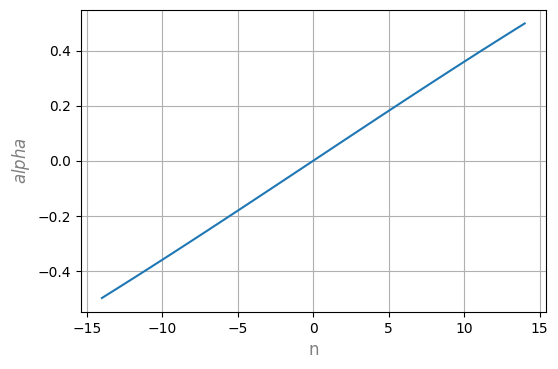

In [7]:
#plt.figure(figsize=(5,5),dpi = 100)
plt.figure(dpi = 100)
plt.plot(n, alpha_n_data)
plt.xlabel('n', fontsize=12, color='gray')
plt.ylabel("$alpha $", fontsize=12, color='gray')
plt.grid(True)

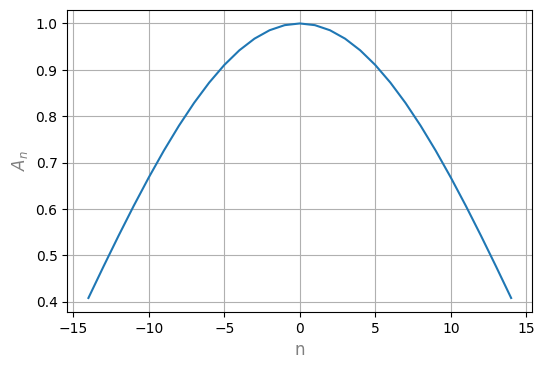

In [8]:
#plt.figure(figsize=(5,5),dpi = 100)
plt.figure(dpi = 100)
plt.plot(n, A_n_data)
plt.xlabel('n', fontsize=12, color='gray')
plt.ylabel("$A_n $", fontsize=12, color='gray')
plt.grid(True)

Значения фазовых сдвигов, соотвествющие идеальному фазированию антенны

In [9]:
varphi_term_n = lambda Theta_0,n: -k*n*d*sin(Theta_0)
varphi_term_n_data = [varphi_term_n(Theta_0_i,n_i) for n_i in n]


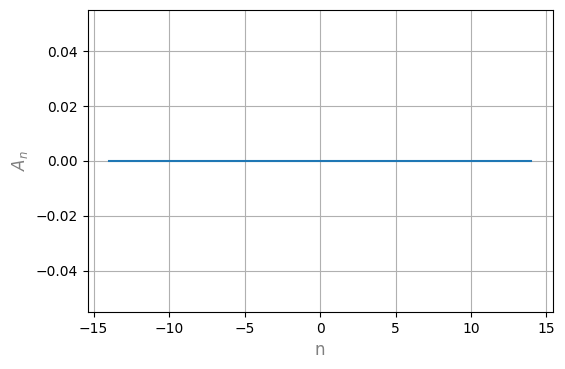

In [10]:
plt.figure(dpi = 100)
plt.plot(n, varphi_term_n_data)
plt.xlabel('n', fontsize=12, color='gray')
plt.ylabel("$A_n $", fontsize=12, color='gray')
plt.grid(True)

Значения фазовых сдвигов, соотвествющие регулировки фазы с дискретом антенны

In [11]:
Delta_varphi = math.radians(45)
varphi_d_n = lambda varphi_prime_n: Delta_varphi * int((varphi_prime_n/Delta_varphi + 0.5))
varphi_prime_n = lambda varphi_term_n: varphi_term_n - int(varphi_term_n / (2*pi))*2*pi

In [12]:
varphi_prime_n_data = list(map(varphi_prime_n,varphi_term_n_data))
varphi_d_n_data = list(map(varphi_d_n,varphi_prime_n_data))



#len(varphi_d_n_data) 

#[[varphi_d_n(varphi_term_m_i) for varphi_term_m_i in Theta_0_i] for Theta_0_i in varphi_term_m_data]

In [13]:
#plt.figure(dpi = 100)
#plt.plot(n, varphi_prime_n_data)
#plt.xlabel('n', fontsize=12, color='gray')
#plt.ylabel("$A_n $", fontsize=12, color='gray')
#plt.grid(True)

Коэффициент усиления антенны

In [14]:
eta = 0.8
S = L*B
alpha_ph = alpha_amp = 0.1
c = exp(- alpha_ph - alpha_amp)
g = 0.7
nu = sin(Delta_varphi/2)**2 / (Delta_varphi/2)**2
G = lambda Theta_0: eta*nu*c*g*cos(Theta_0)*4*pi*S /lambda_0**2


In [15]:
[G(Theta_0_i) for Theta_0_i in Theta_0]

[88.75946227955552, 87.89566129411573, 85.32107124141879]

Расчет ДН антенны с ферритовой линзой в плоскости сканирования

In [16]:
N = len(n)

F = lambda Theta,Theta_0:cos(Theta)*(( A_n_data[0]/2 + sum([A_n_data[n]*cos(k*n*d*sin(Theta) + varphi_d_n_data[n] ) for n in range(1,N)]) ) / ( A_n_data[0]/2 + sum([A_n_data[n] for n in range(1,N)]) ) )
#* ( (A_n_data[0]/2 + sum([A_n_data[n]*cos(k*n*d*sin(Theta) + varphi_d_n) for n in range(1,) ] 

In [17]:
Theta = np.linspace(math.radians(-40),math.radians(40),int(1e4))
F_data = ([F(Theta_i,Theta_0_i) for Theta_i in Theta])


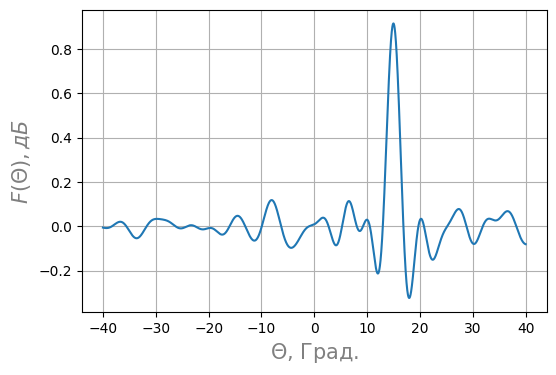

In [24]:
Theta_to_deg = list(map(math.degrees,Theta))
#F_data_to_db = 20 * np.log10(np.abs(F_data))
#plt.figure(figsize=(5,5),dpi = 100)
plt.figure(dpi = 100)
plt.plot(Theta_to_deg,F_data)
plt.xlabel('$\Theta$, Град.', fontsize=15, color='gray')
plt.ylabel("$F(\Theta), дБ$", fontsize=15, color='gray')
plt.grid(True)

In [19]:
#varphi_term_n = lambda Theta_0,n: -k*n*d*sin(Theta_0)

varphi_term_n_data = [varphi_term_n(Theta_0[1],n_i) for n_i in n]

#varphi_d_n = lambda varphi_prime_n: Delta_varphi * int((varphi_prime_n/Delta_varphi + 0.5))
#varphi_prime_n = lambda varphi_term_n: varphi_term_n - int(varphi_term_n / (2*pi))*2*pi

varphi_prime_n_data = list(map(varphi_prime_n,varphi_term_n_data))
varphi_d_n_data = list(map(varphi_d_n,varphi_prime_n_data))

#F = lambda Theta,Theta_0:cos(Theta)*(( A_n_data[0]/2 + sum([A_n_data[n]*cos(k*n*d*sin(Theta) + varphi_d_n_data[n] ) for n in range(1,N)]) ) / ( A_n_data[0]/2 + sum([A_n_data[n] for n in range(1,N)]) ) )
F_data = ([F(Theta_i,Theta_0[1]) for Theta_i in Theta])

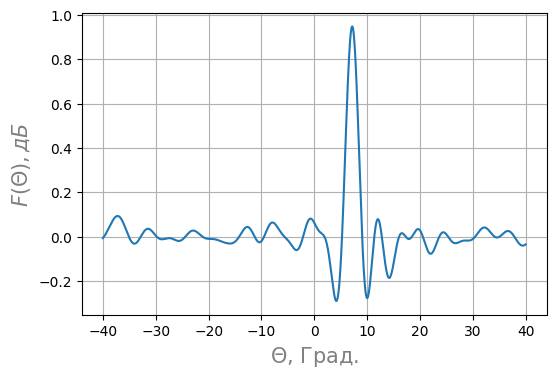

In [20]:
#plt.figure(figsize=(5,5),dpi = 100)
plt.figure(dpi = 100)
plt.plot(Theta_to_deg,F_data)
plt.xlabel('$\Theta$, Град.', fontsize=15, color='gray')
plt.ylabel("$F(\Theta), дБ$", fontsize=15, color='gray')
plt.grid(True)

In [21]:


varphi_term_n_data = [varphi_term_n(Theta_0[2],n_i) for n_i in n]



varphi_prime_n_data = list(map(varphi_prime_n,varphi_term_n_data))
varphi_d_n_data = list(map(varphi_d_n,varphi_prime_n_data))

F_data = ([F(Theta_i,Theta_0[2]) for Theta_i in Theta])

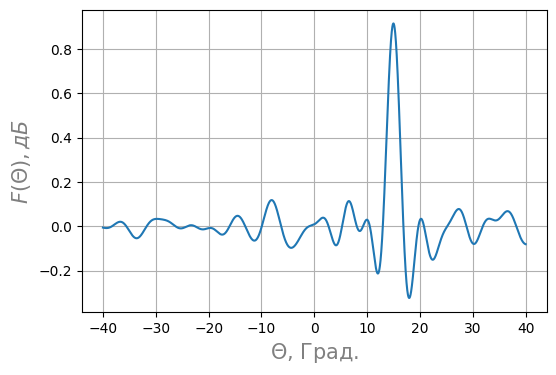

In [22]:
#plt.figure(figsize=(5,5),dpi = 100)
plt.figure(dpi = 100)
plt.plot(Theta_to_deg,F_data)
plt.xlabel('$\Theta$, Град.', fontsize=15, color='gray')
plt.ylabel("$F(\Theta), дБ$", fontsize=15, color='gray')
plt.grid(True)